# Social Media Sentiment

Spammer and Fake Account Detection on Instagram

**Ifeoma Azikiwe** (F318806)

**Yen-Ju Chen** (F316826)

**You-Hsuan Chou** (F316091)

**Akshatha Ilangovan** (F317060)

**Yixuan Lin** (F237538)

## Introduction

As the numbers of users of social media increased in recent years, Mughaid et al (2023) discovered that the prevalence of fake accounts constitutes one of the significant issues within the realm of social platforms. Some accounts engaged in leaving spam can be manipulated to leave harrasing messages as comments beneath users' posts, to publish spam advertisements, to send fraud information, and to generate artificial followers for collecting user data. Li et al (2022) argued that the existence of such deceptive accounts raises concerns about the platform's credibility, thereby potentially influencing user satisfaction among authentic users of the application. Therefore, it is vital to detect  fake account propagation in social platforms and remove them (State Kondeti et al, 2021, cited in Uppada et al, 2022). To solve the negative experience of users, in this report, an AI technology has been deployed for identifying counterfeit accounts. The study has utilised datasets based on meticulously curated data comprising of both authentic users and spurious junk message senders on Instagram, featuring an array of Personal Identifiable Information (PII). Next, the core data features have been processed using Exploratory Data Analysis (EDA) model, followed by a demonstration of the operating process of logistic regression machine learning algorithm. Finally, the assessment of the model's performance is conducted and some future directions of the use of this AI technique has been proposed.

## Dataset Description

This dataset, collected from Instagram using a crawler, originally targeted 696 accounts had been split into two sets of training(596 instances, which were equally grouped as either spammer and non-spammer; 50% in each set), and testing(120 instances, which had also been divided in equal proportions of spammer and non-spammer in a ratio of 50/50).This approximates to an 80/20 split respectively for the performance assessment of the machine learning model. However, for the purposes of this report, only the test dataset has been explored in an approximate split of 70/30 for testing and training respectively. Some data preprocessing was performed after which 2 duplicate instances were found and dropped from the dataset.

The following account features have been investigated as input variables:
* Whether the user had a profile picture or not
* The ratio of the number of numerical chars in the account username to its length
* The full name of the account in word tokens
* The ratio of the number of numerical characters in full name to its length
* Whether the username and full name are literally the same
* The length of the user account’s biography
* Whether the account contained a private url or not
* If the account was a private or a public one
* How many posts had been made by the account
* The numbers of followers
* The follows that are linked to the account.

The goal of the machine learning model, the only output variable and the label in the dataset, was to correctly predict whether the account was fake or not.

## Exploratory Data Analysis

In [116]:
# Importing the necessary libraries
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

#Loading the training data
train = pd.read_csv('train.csv')
train.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


### Statistics Summary

In [117]:
train.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
profile pic,576.0,0.701389,0.458047,0.0,0.0,1.0,1.00,1.00
nums/length username,576.0,0.163837,0.214096,0.0,0.0,0.0,0.31,0.92
fullname words,576.0,1.460069,1.052601,0.0,1.0,1.0,2.00,12.00
nums/length fullname,576.0,0.036094,0.125121,0.0,0.0,0.0,0.00,1.00
name==username,576.0,0.034722,0.183234,0.0,0.0,0.0,0.00,1.00
description length,576.0,22.623264,37.702987,0.0,0.0,0.0,34.00,150.00
external URL,576.0,0.116319,0.320886,0.0,0.0,0.0,0.00,1.00
private,576.0,0.381944,0.486285,0.0,0.0,0.0,1.00,1.00
#posts,576.0,107.489583,402.034431,0.0,0.0,9.0,81.50,7389.00
#followers,576.0,85307.236111,910148.457657,0.0,39.0,150.5,716.00,15338538.00


From the above statistics summary, we can assume the findings:

* On average, around 70% of the users on Instagram have a profile picture.
* There is a huge difference between the mean and the median values of the ratio of username length, full name words, description length, posts, followers and follow numbers. There might be some outliers in the data that affected the mean.
* Approximately 90% of the users on the platform do not provide an external URL on the profile page.
* There is a major gap between the standard deviation and the maximum value of description length, external URL, full name words, followers and follow numbers. Therefore, the graphics of these features are right-skewed.

### Data Transformation

#### Removing duplicates and outliers

Some features include extreme values that can influence the quality of the analysis. In order to improve the further visualisation performance, the duplicates and outliers are cleaned from the raw dataset. Applying boxplots, it can be observed the removal of instances that exceed the normal range to make the data more organised.

In [118]:
duplicateValues = train.duplicated ()
print(duplicateValues.sum())
train[duplicateValues]

2


,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
197,1,0.00,2,0.0,0,48,0,0,222,5282,652,0
525,1,0.91,1,0.0,0,0,0,0,0,75,26,1


In [119]:
train.drop_duplicates (inplace=True)

duplicatedValues = train.duplicated()
duplicatedValues.sum ()

0

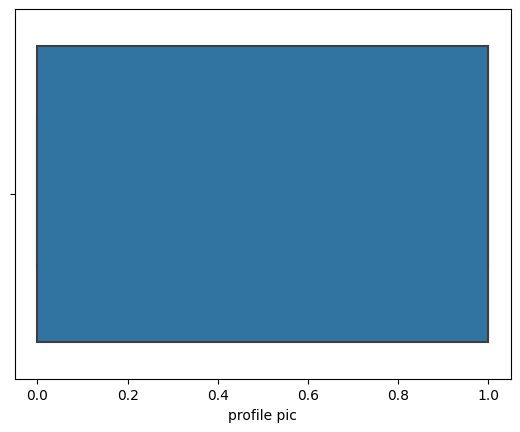

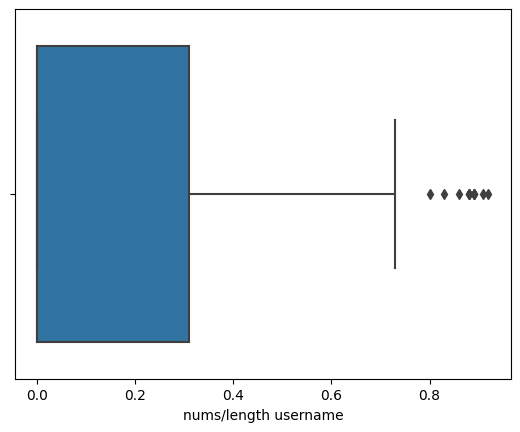

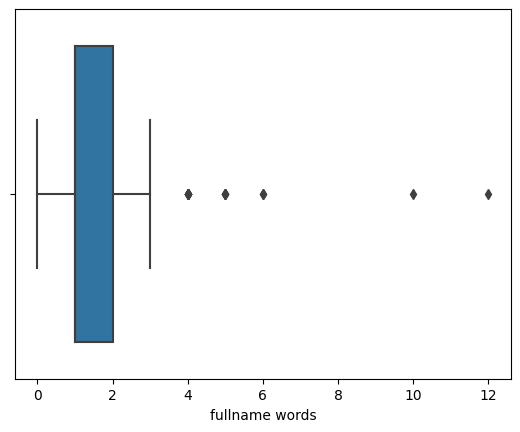

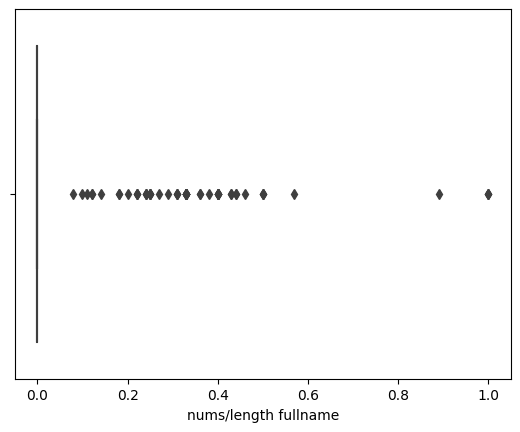

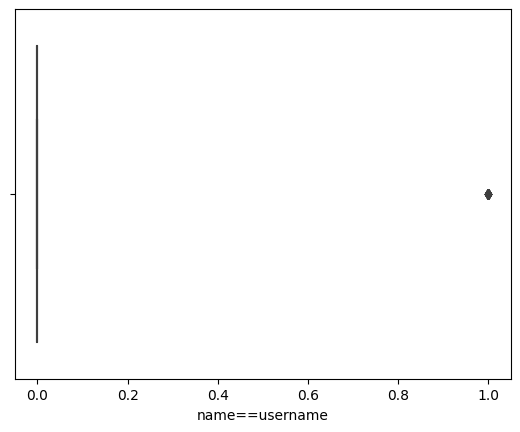

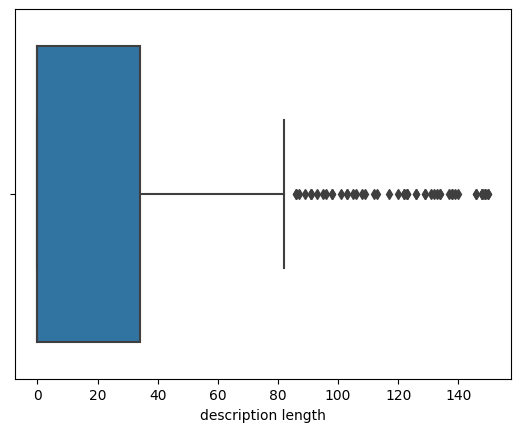

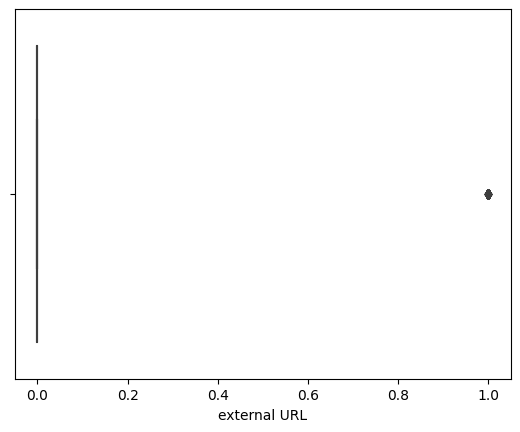

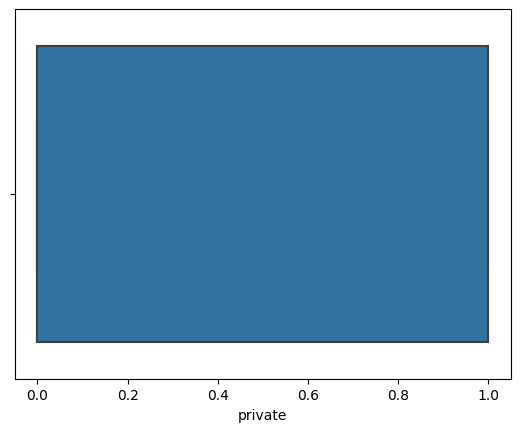

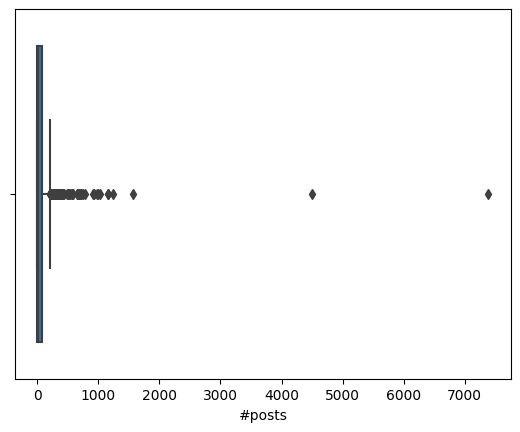

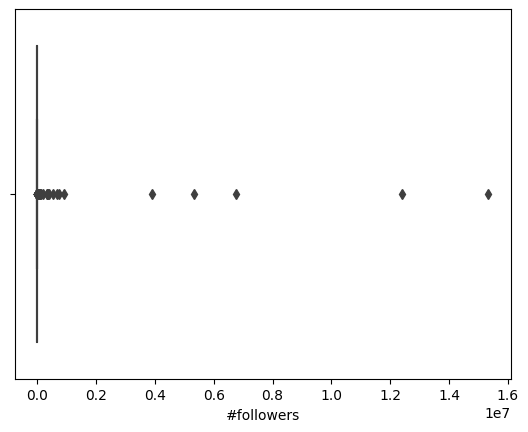

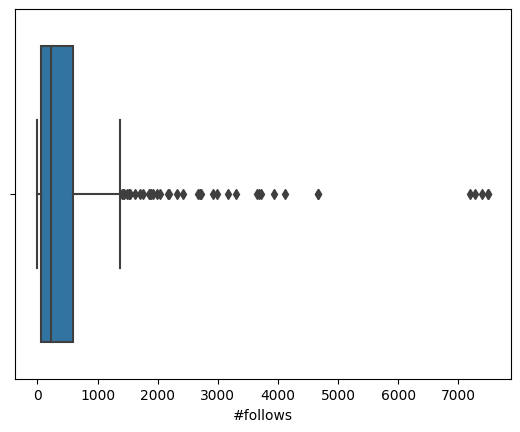

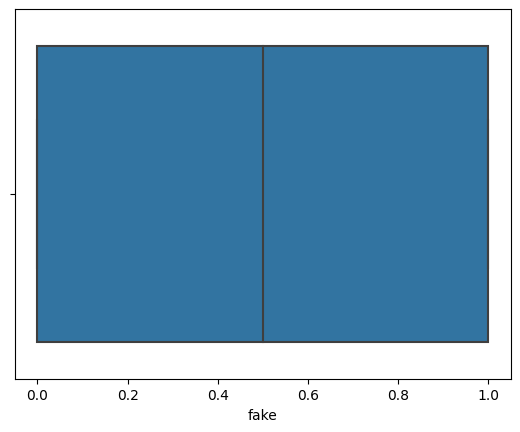

In [120]:
num_cols = train.select_dtypes(include=np.number).columns.tolist()

for col in num_cols:
    sns.boxplot(x=train[col])
    plt.show()

In [121]:
def removeOutlier (cols):
  sorted(cols)
  quant1, quant2 = cols.quantile([0.25,0.75])
  IQR = quant2 - quant1
  lowerRange = quant1 - (1.5 * IQR)
  upperRange = quant2 + (1.5 * IQR)
  return lowerRange, upperRange

In [122]:
lowScore, highScore = removeOutlier(train[ 'nums/length username'])
train['nums/length username'] = np.where(train['nums/length username']>highScore,highScore,train['nums/length username'])
train[ 'nums/length username'] = np.where(train['nums/length username']<lowScore, lowScore,train['nums/length username'])

In [123]:
lowScore, highScore = removeOutlier(train[ 'nums/length username'])
train['nums/length username'] = np.where(train['nums/length username']>highScore,highScore,train['nums/length username'])
train[ 'nums/length username'] = np.where(train['nums/length username']<lowScore, lowScore,train['nums/length username'])

<function matplotlib.pyplot.show(close=None, block=None)>

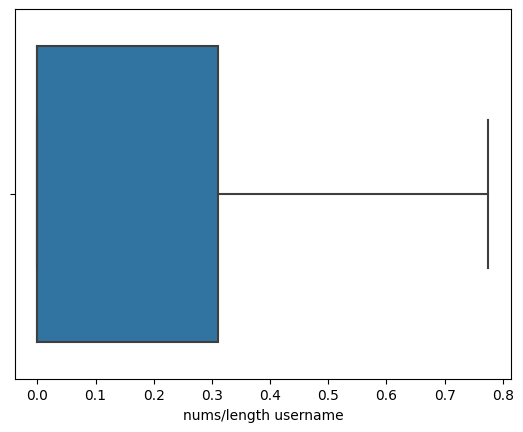

In [124]:
sns.boxplot(x= train['nums/length username'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

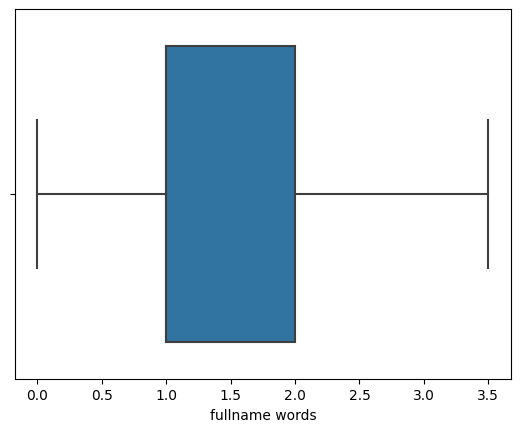

In [125]:
lowScore, highScore = removeOutlier(train[ 'fullname words'])
train['fullname words'] = np.where(train['fullname words']>highScore,highScore,train['fullname words'])
train['fullname words'] = np.where(train['fullname words']<lowScore, lowScore,train['fullname words'])
sns.boxplot(x=train['fullname words'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

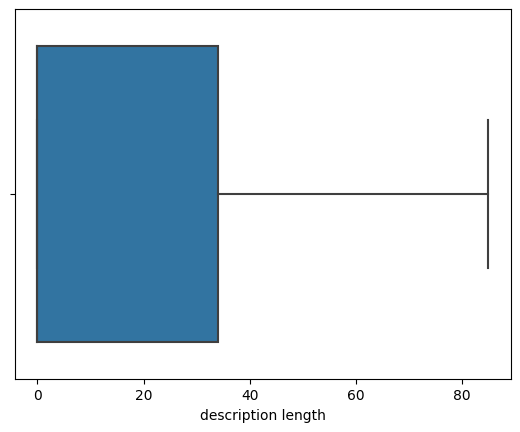

In [126]:
lowScore, highScore = removeOutlier(train['description length'])
train['description length'] = np.where(train['description length']>highScore,highScore,train['description length'])
train['description length'] = np.where(train['description length']<lowScore, lowScore,train['description length'])
sns.boxplot(x=train['description length'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

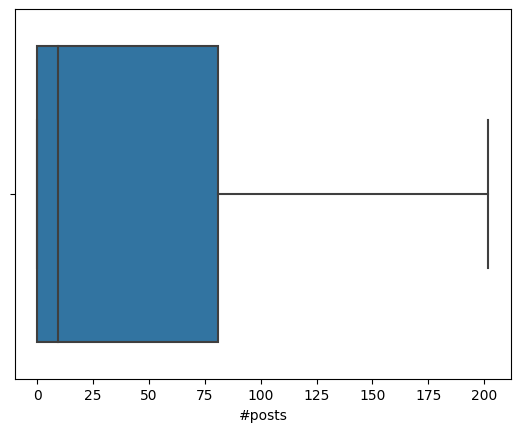

In [127]:
lowScore, highScore = removeOutlier(train['#posts'])
train['#posts'] = np.where(train['#posts']>highScore,highScore,train['#posts'])
train['#posts'] = np.where(train['#posts']<lowScore, lowScore,train['#posts'])
sns.boxplot(x=train['#posts'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

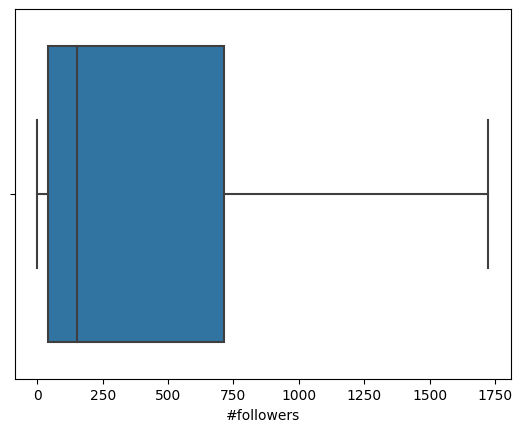

In [128]:
lowScore, highScore = removeOutlier(train['#followers'])
train['#followers'] = np.where(train['#followers']>highScore,highScore,train['#followers'])
train['#followers'] = np.where(train['#followers']<lowScore, lowScore,train['#followers'])
sns.boxplot(x=train['#followers'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

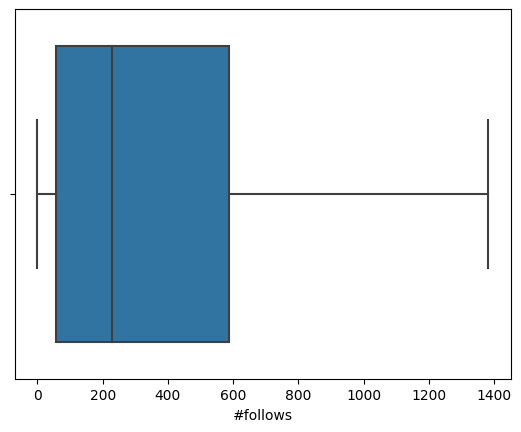

In [129]:
lowScore, highScore = removeOutlier(train['#follows'])
train['#follows'] = np.where(train['#follows']>highScore,highScore,train['#follows'])
train['#follows'] = np.where(train['#follows']<lowScore, lowScore,train['#follows'])
sns.boxplot(x=train['#follows'])
plt.show

#### Data Visualization

##### Heatmap

Since the dataset includes numerous variables, heatmap is the intuitive method that has been used to get the primary observation. According to the heatmap below, the color of profile picture, description length, posts and followers darkens. The intensity of the colour gradience indicates a stronger negative correlation with the label, fake amongst the four features thereby highly suggesting that the social media accounts might be fake. Conversely, the length of the username and full name have positive correlation with the label, thus, also adding to the insights on detection of fake accounts.

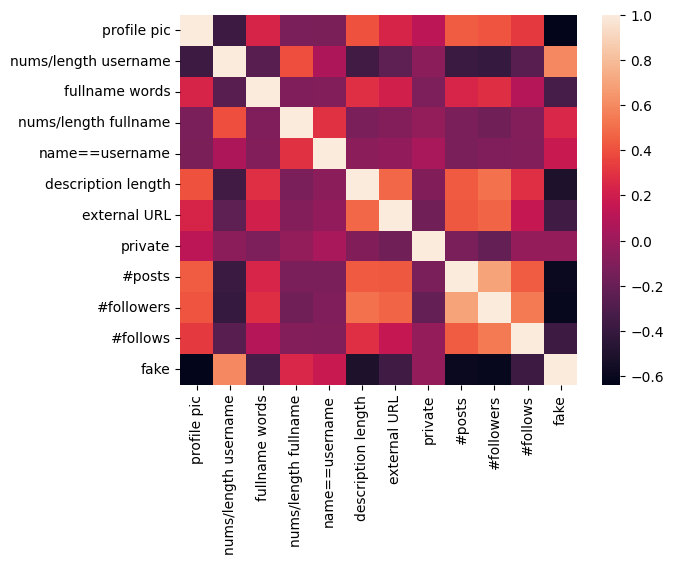

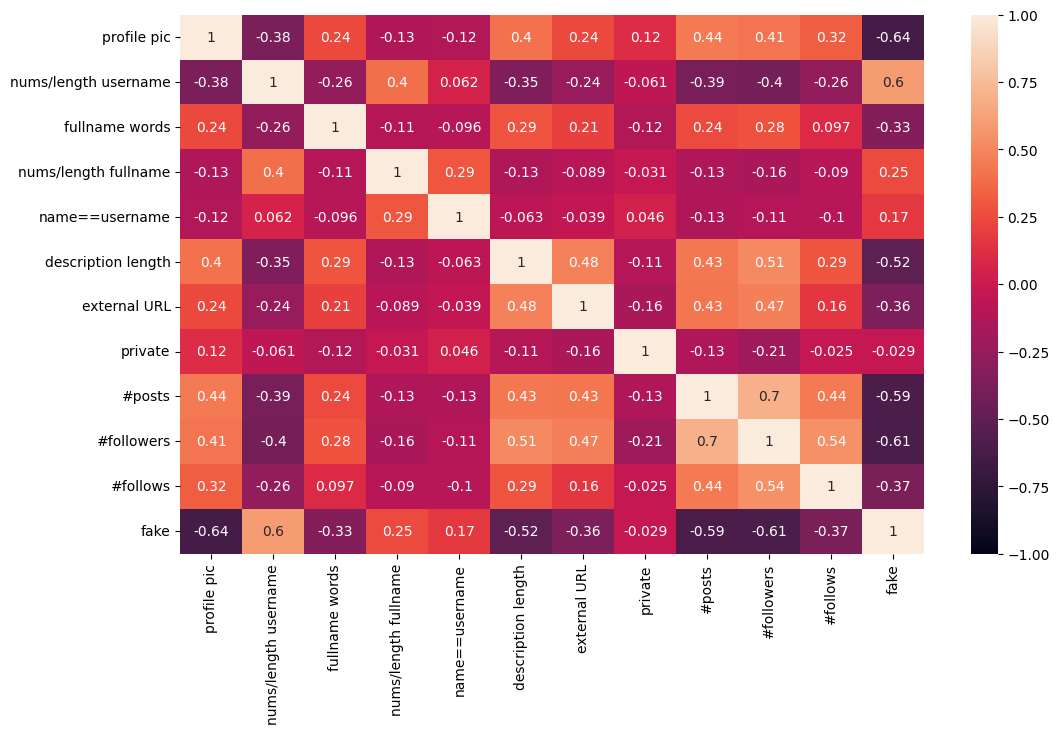

In [130]:
train.corr()
sns.heatmap(train.corr())

plt.figure(figsize=(12, 7))
heatmap = sns.heatmap(train.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

##### Distribution Plots

Distribution plots can also be used to further study the density of the variables. According to the first distribution plot, it is indicated that if the account provides a profile picture, there is a higher possibility that the account is a real account. The second graphic shows that most of the real users have a relatively short username. Furthermore, the third plot deploys that almost all the fake accounts do not provide descriptions in their profile pages. The fourth picture reveals that the fake users have extremely few posts in their accounts. Finally, the last two graphics demonstrate that fake accounts usually do not have many follows or follower accounts.

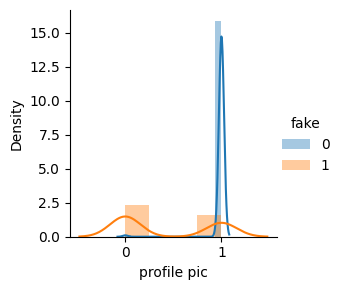

In [131]:
sns.FacetGrid(train, hue= "fake").map(sns.distplot, "profile pic").add_legend()
plt.show()

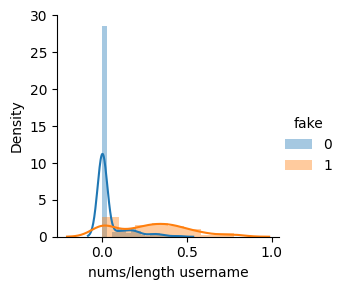

In [132]:
sns.FacetGrid(train, hue= "fake").map(sns.distplot, "nums/length username").add_legend()
plt.show()

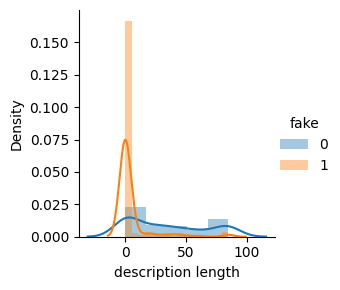

In [133]:
sns.FacetGrid(train, hue= "fake").map(sns.distplot, "description length").add_legend()
plt.show()

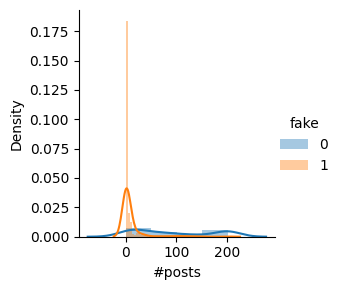

In [134]:
sns.FacetGrid(train, hue= "fake").map(sns.distplot, "#posts").add_legend()
plt.show()

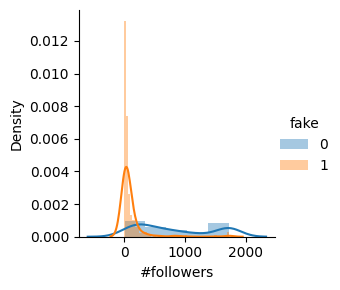

In [135]:
sns.FacetGrid(train, hue= "fake").map(sns.distplot, "#followers").add_legend()
plt.show()

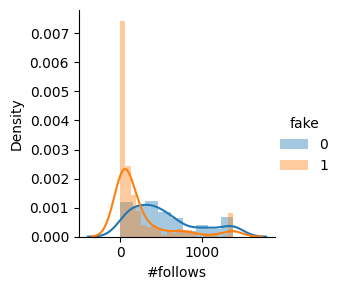

In [136]:
sns.FacetGrid(train, hue= "fake").map(sns.distplot, "#follows").add_legend()
plt.show()

## Feature Engineering

### Data Preprocessing

Based on the insights drawn from the Exploratory Data Analysis (EDA) and the information obtained about the dataframe using the .info() function, a clear understanding of the dataset at hand has been obtained.

In [137]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 574 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           574 non-null    int64  
 1   nums/length username  574 non-null    float64
 2   fullname words        574 non-null    float64
 3   nums/length fullname  574 non-null    float64
 4   name==username        574 non-null    int64  
 5   description length    574 non-null    float64
 6   external URL          574 non-null    int64  
 7   private               574 non-null    int64  
 8   #posts                574 non-null    float64
 9   #followers            574 non-null    float64
 10  #follows              574 non-null    float64
 11  fake                  574 non-null    int64  
dtypes: float64(7), int64(5)
memory usage: 58.3 KB


This dataframe has been then split to separate the target column which is essential for training the model.

In [138]:
y = train.copy()['fake']
X = train.copy()

X.pop('fake')
n_samples,n_features = X.shape
print(n_samples,'samples with',n_features,'features')
X.head()

574 samples with 11 features


,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
0,1,0.27,0.0,0.0,0,53.0,0,0,32.000,1000.000,955.0
1,1,0.00,2.0,0.0,0,44.0,0,0,201.875,1724.625,533.0
2,1,0.10,2.0,0.0,0,0.0,0,1,13.000,159.000,98.0
3,1,0.00,1.0,0.0,0,82.0,0,0,201.875,414.000,651.0
4,1,0.00,2.0,0.0,0,0.0,0,1,6.000,151.000,126.0


In [139]:
print(y.shape)
y.head()

(574,)


0    0
1    0
2    0
3    0
4    0
Name: fake, dtype: int64

#### Handling Missing Data

Handling missing values is a key step within data preprocessing to achieve more optimized results while testing a model (Kwak and Kim, 2017; Emmanuel et al., 2021). In this particular dataset, no missing values were found. Therefore, no techniques were employed to handle missing values.

In [140]:
print('Columns with missing values'.center(64,'='))
column_missing = X.isna().any(axis = 0)
print(column_missing)

==================Columns with missing values===================
profile pic             False
nums/length username    False
fullname words          False
nums/length fullname    False
name==username          False
description length      False
external URL            False
private                 False
#posts                  False
#followers              False
#follows                False
dtype: bool


#### Transforming Ordinal and Categorical Features

Transforming data into an optimal form for use in a machine learning model greatly improves performance (Erol et al., 2022). The various types of data present within the dataset have been first determined using the .dtypes () function. This was followed by checking if any of the objects are of the type *object*. Further, using One-Hot Encoding or the use of dummy variables (Erol et al., 2022), the numerical values of categorical values were obtained. Following this, redundant values within the target array were dropped. The success of the transformation may be further evaluated.

In [141]:
#Understanding the datatypes in the dataset
X.dtypes

profile pic               int64
nums/length username    float64
fullname words          float64
nums/length fullname    float64
name==username            int64
description length      float64
external URL              int64
private                   int64
#posts                  float64
#followers              float64
#follows                float64
dtype: object

In [142]:
#Checking if any of the columns are of type object
from pandas.api.types import is_object_dtype

for col in X.columns:
    if is_object_dtype(X[col]):
     print(X[col].value_counts(normalize = True))
     print()

In [143]:
#One-hot Encoding or dummy variables for numerical values
#Out of categorical values
X = pd.get_dummies(X)
X.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
0,1,0.27,0.0,0.0,0,53.0,0,0,32.000,1000.000,955.0
1,1,0.00,2.0,0.0,0,44.0,0,0,201.875,1724.625,533.0
2,1,0.10,2.0,0.0,0,0.0,0,1,13.000,159.000,98.0
3,1,0.00,1.0,0.0,0,82.0,0,0,201.875,414.000,651.0
4,1,0.00,2.0,0.0,0,0.0,0,1,6.000,151.000,126.0


In [144]:
#Dropping the redundant values
y = pd.get_dummies(y, drop_first = True)
y.head()

,1
0,0
1,0
2,0
3,0
4,0


#### Normalisation of numerical data

Normalization of data majorly contributes to higher performance of the model (O’rourke et al., 2019). Using StandardScaler module, the automated normalization of numerical data has been carried out to ensure that all values within the dataset fall within an appropriate range for parsing through the model of choice.

In [145]:
#Importing StandardScaler
from sklearn.preprocessing import StandardScaler

#Creating a StandardScaler Object
scaler = StandardScaler()
Xnum = scaler.fit_transform(X)

#Defining the values in y as a 1D numpy array
ynum = y.values.ravel()

### Model Selection

In this project, the classification technique of logistic regression has been used for the detection of spam accounts on social media platforms. This choice was made by considering the performance efficiency of the model while dealing with categorical data with binary states (Sai Raja, L V S Aditya and Mohanty, 2023).

#### Classification

Logistic Regression from Scikit-learn was leveraged to classify social media accounts based on their genuity.

In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#Logistic Regression
classifier = LogisticRegression(solver = 'liblinear')

#Splitting our dataset for training and testing
Xtrain, Xtest, ytrain, ytest = train_test_split (Xnum, ynum, test_size = 0.33, random_state = 0)

#Training the regressor
classifier.fit(Xtrain, ytrain)

#Printing the mean accuracy of the classifier using .score()
print('Mean accuracy', classifier.score(Xtrain, ytrain))

Mean accuracy 0.921875



##### Measuring Classification Performance

 In this model, the dataset was split in sets of 67% training and 33% testing. The calculated mean accuracy of the classifier on the training set is 0.921, indicating approximately 92% correct predictions.  

Predictions were made on the test set (Xtest), and the following metrics of precision, recall, and F1 scores for each class ('no' and 'yes'), along with overall accuracy and macro/ micro averages were obtained. In this case, the classifier achieved 93% accuracy.

Finally, the Validation Curve for Logistic Regression was explored, examining how the logistic regression model's performance with variations in specific hyperparameters performed. It was noted that the "Validation Curve" and "Training Score" lines closely overlap. Tomasz B. et al. (2023, pp. 295-297) suggest that the relationship between "Validation Curve" and "Training Score" line points to:


* **Good generalisability:** The model reveals similarly on both training and validation performance, indicating effective generalisation to unseen data.

* **Absence of overfitting or underfitting:** Overfitting performs better on training data but poorer on validation sets, while underfitting does the opposite. The close overlap of the two curves indicates a balanced model, neither overfitting nor underfitting.

In this operation, we found that the logistic regression classifier has the following advantages and disadvantages (Jack V. Tu, 1996, pp. 1225-1231):

**Advantages:**


*   **Strong interpretability:** The results of Logistic Regression are intuitively interpretable, and the weight of each feature can be used to explain the impact on the results.
* **Not easy to overfit:** When the amount of data is not large, the problem of overfitting is relatively unlikely to occur.

**Shortcomings:**

* **Poor performance in non-linear relationships:** Logistic Regression models are linear relationships in feature space, so performance may be poor in complex nonlinear relationships.

In [147]:
from sklearn.metrics import classification_report

classifier = LogisticRegression(solver = 'liblinear')

#Training to get predictions
classifier.fit(Xtrain, ytrain)
ypred = classifier.predict(Xtest)
print('LogisticRegression'.center(64,'='))
print(classification_report(ytest,ypred,target_names = ['no','yes']))
print('='*64)

=======================LogisticRegression=======================
              precision    recall  f1-score   support

          no       0.88      0.98      0.93        84
         yes       0.98      0.90      0.94       106

    accuracy                           0.93       190
   macro avg       0.93      0.94      0.93       190
weighted avg       0.94      0.93      0.93       190



In [148]:
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve

#Plotting Learning Curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, shuffle=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

#Plotting the Validation Curve
def plot_validation_curve(estimator, title, X, y, param_name, param_range, ylim=None, cv=5,
                        n_jobs=None, scoring=None):
    train_scores, test_scores = validation_curve(
        estimator, Xnum, ynum, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=n_jobs)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.semilogx(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    plt.show()
    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

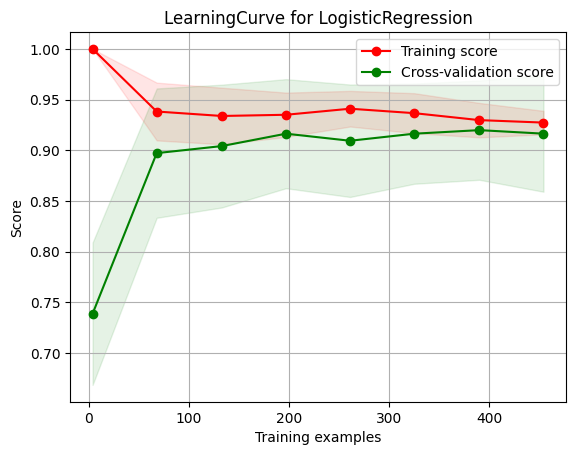

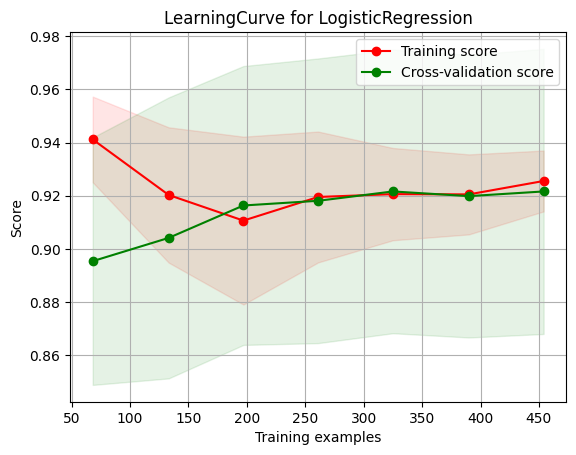

In [149]:
plot_learning_curve(LogisticRegression(solver='liblinear', penalty='l1'), 'LearningCurve for LogisticRegression', Xnum, ynum, cv=5, train_sizes=np.linspace(0.01, 0.99, 8))
plot_learning_curve(LogisticRegression(solver='liblinear', penalty='l1', class_weight='balanced'), 'LearningCurve for LogisticRegression', Xnum, ynum, cv=5, train_sizes=np.linspace(0.01, 0.99, 8))

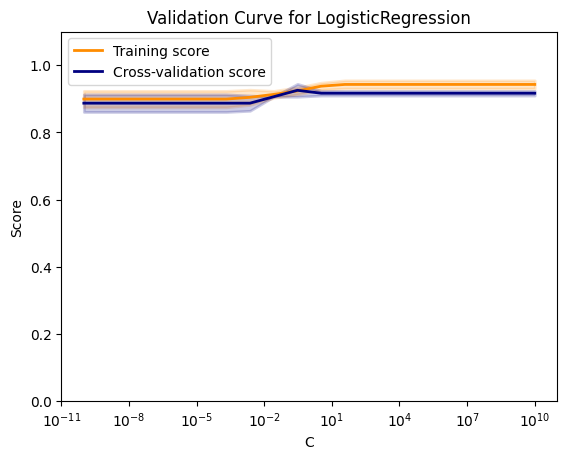

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

In [150]:
from sklearn.model_selection import learning_curve
param_range = np.logspace(-10, 10, 20)
plot_validation_curve(LogisticRegression(solver='liblinear'), 'Validation Curve for LogisticRegression', Xnum, ynum, "C", param_range, cv=2)

## Discussion and Interpretation

Masood et al (2019) suggest that features including follower and following numbers are helpful to identify spam. The findings from the EDA present that particular features are distinct indicators for fake account detection, such as profile picture, description length, posts and followers. Beyond that, the more relevant variables to dissect the profiles, the more suspicious accounts can be flagged.
In terms of model evaluation, choosing the appropriate model based on the specific problem is necessary. In this project, logistic regression is a simple and effective classification algorithm that is particularly suitable for linearly separable problems, but may perform poorly when dealing with complex nonlinear problems and a large number of features. Moreover, validation methods are also crucial for assessing the stability of machine learning algorithms, against falling into the overfitting and underfitting traps.

## Conclusion and Future Direction

Social media, a global hub for connection and commerce, presents lucrative advertising opportunities (Bharti et al., 2021). Amidst this vast digital landscape, malevolent actors exploit channels to disseminate harmful content. Enter our cutting-edge AI technique, combating the surge of spam accounts. Our operational pipeline, featuring meticulous dataset curation, EDA, and potent machine learning, has proven effective. Looking ahead, our roadmap involves enhancing the model with additional features and testing across diverse platforms. As noted by Gheewala and Patel (2018), spam accounts exhibit intelligence, prompting continuous model training. The future of spam detection is intelligent, adaptive, and ready for evolving challenges.

## References

Bharti, K.K. et al (2021) Fake account detection in twitter using logistic regression with particle swarm optimization, *Soft Comput*, vol.25, p.11333-11345.

Burzykowski, T., Geubbelmans, M., Rousseau, A., Valkenborg, D. (2023) *American Journal of Orthodontics and Dentofacial Orthopedics*. Available at:  https://doi.org/10.1016/j.ajodo.2023.05.007 (Accessed: 22 Nov 2023).

Ekosputra, M. J., Susanto, A., Haryanto, F. and Suhartono, D., "Supervised Machine Learning Algorithms to Detect Instagram Fake Accounts," *2021 4th International Seminar on Research of Information Technology and Intelligent Systems (ISRITI)*, Yogyakarta, Indonesia, 2021, pp. 396-400, doi: 10.1109/ISRITI54043.2021.9702833.

Emmanuel, T. et al. (2021) ‘A survey on missing data in machine learning’, *Journal of Big Data, 8(1)*. Available at: https://doi.org/10.1186/s40537-021-00516-9.

Erol, G. et al. (2022) ‘Analyzing the effect of data preprocessing techniques using machine learning algorithms on the diagnosis of COVID-19’, *Concurrency and Computation: Practice and Experience*, 34(28). Available at: https://doi.org/10.1002/cpe.7393.

Gheewala, S., & Patel, R. (2018, February). Machine learning based Twitter Spam account detection: a review. *2018 Second International Conference on Computing Methodologies and Communication (ICCMC)*(pp. 79-84). IEEE.

Kwak, S.K. and Kim, J.H. (2017) ‘Statistical data preparation: Management of missing values and outliers’, *Korean Journal of Anesthesiology*. Korean Society of Anesthesiologists, pp. 407–411. Available at: https://doi.org/10.4097/kjae.2017.70.4.407.

Li, S. et al (2022) SybilFlyover: Heterogeneous graph-based fake account detection model on social networks. *Knowledge-Based Systems*, vol.258, p.110038.

Masood, F., Almogren, A., Abbas, A., Khattak, H. A., Din, I. U., Guizani, M., & Zuair, M. (2019). Spammer detection and fake user identification on social networks. *IEEE Access*, 7, 68140-68152.

Mughaid, A. et al (2023) A novel machine learning and face recognition technique for fake accounts detection system on cyber social networks. *Multimedia tools and applications*, vol.82, p.26353-26378.

O’rourke, M.B. et al. (2019) ‘What is normalization? The strategies employed in top-down and bottom-up proteome analysis workflows’, *Proteomes*. MDPI AG, pp. 1–19. Available at: https://doi.org/10.3390/proteomes7030029.

Sai Raja, E.V., L V S Aditya, B. and Mohanty, S.N. (2023) ‘Fake Profile Detection Using Logistic Regression and Gradient Descent Algorithm on Online Social Networks’, *ICST Transactions on Scalable Information Systems [Preprint]*. Available at: https://doi.org/10.4108/eetsis.4342.

Tu, J. V. (1996) *Advantages and disadvantages of using artificial neural networks versus logistic regression for predicting medical outcomes*. Available at: https://doi.org/10.1016/S0895-4356(96)00002-9 (Accessed: 22 Nov 2023).

Uppada, S.K. et al (2022) Novel approaches to fake news and fake account detection in OSNs: user social engagement and visual content centric model. *Social Network Analysis and Mining, vol.12*, p.52.